# Data toolkit Assignment
>>Practical Python – Error Handling, Logging, and Data Manipulation

1. What is the difference between multithreading and multiprocessing?
   - Multithreading and multiprocessing are two ways to achieve concurrency in programming, meaning running multiple tasks seemingly at the same time. Here's the key difference:
   
      * Multithreading: In multithreading, multiple threads of execution exist within a single process. These threads share the same memory space. This can be more memory-efficient and faster for I/O-bound tasks (tasks that spend a lot of time waiting for input/output operations, like reading files or making network requests). However, because they share memory, you need to be careful about potential race conditions and use locking mechanisms to protect shared data. Due to the Global Interpreter Lock (GIL) in CPython (the standard Python implementation), true parallel execution of CPU-bound tasks (tasks that spend most of their time doing computations) is not possible with multithreading in a single process.
  
      * Multiprocessing: In multiprocessing, multiple processes are created, each with its own independent memory space. This allows for true parallel execution of CPU-bound tasks, as the GIL does not affect separate processes. Communication between processes usually happens through mechanisms like pipes or queues, which require more overhead than sharing memory.

2. What are the challenges associated with memory management in Python?
   - Memory management in Python, while largely automatic due to its built-in garbage collection, can still present certain challenges. Here are some of the key ones:
    
        * Memory Leaks: Although Python has garbage collection, it's still possible to have memory leaks. This often happens when objects that are no longer needed are still referenced, preventing the garbage collector from reclaiming their memory.

        * High Memory Usage: Python can sometimes consume more memory than languages with manual memory management. This is partly due to object overhead and the way dynamic typing works.

        * Performance Overhead of Garbage Collection: While automatic garbage collection is convenient, the process of identifying and reclaiming unused memory takes CPU time. For performance-critical applications, the pauses introduced by garbage collection cycles can be a concern.

        * Fragmentation: As objects are allocated and deallocated, the memory space can become fragmented, with small free blocks scattered throughout. While Python's memory allocator tries to mitigate this.

While Python's automatic memory management simplifies development in many cases, being aware of these potential challenges is important for writing efficient and robust applications, especially when dealing with large datasets or performance-sensitive tasks.

3. Write a Python program that logs an error message to a log file when a
division by zero exception occurs.

In [16]:
import logging

# Configure logging to write to a file
logging.basicConfig(filename='error.log', level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s')

def divide_numbers(a, b):
  """Divides two numbers and logs an error if division by zero occurs."""
  try:
    result = a / b
    return result
  except ZeroDivisionError:
    logging.error("Attempted to divide by zero!")
    return None

# Example usage
print(divide_numbers(10, 2))
print(divide_numbers(10, 0))

ERROR:root:Attempted to divide by zero!


5.0
None


4. Write a Python program that reads from one file and writes its content to
another file.

In [17]:
# Program to read from one file and write to another
try:
  with open("source.txt", "r") as source_file:
    content = source_file.read()

  with open("destination.txt", "w") as destination_file:
    destination_file.write(content)

  print("Content successfully copied from 'source.txt' to 'destination.txt'.")

except FileNotFoundError:
  print("Error: The source file was not found.")
except Exception as e:
  print(f"An error occurred: {e}")

Content successfully copied from 'source.txt' to 'destination.txt'.


In [18]:
# Create a dummy source file for demonstration
with open("source.txt", "w") as f:
  f.write("This is the content of the source file.\n")
  f.write("This is the second line.")

print("Created 'source.txt' with some content.")

Created 'source.txt' with some content.


5. Write a program that handles both IndexError and KeyError using a
try-except block.


In [19]:
def handle_errors(my_list, my_dict, index, key):
  """
  Demonstrates handling IndexError and KeyError using a try-except block.
  """
  try:
    # Attempt to access an element by index
    list_element = my_list[index]
    print(f"Accessed list element at index {index}: {list_element}")

    # Attempt to access an element by key
    dict_element = my_dict[key]
    print(f"Accessed dictionary element with key '{key}': {dict_element}")

  except IndexError:
    print(f"Error: IndexError occurred when trying to access index {index}.")

  except KeyError:
    print(f"Error: KeyError occurred when trying to access key '{key}'.")

  except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Example usage:
my_list = [1, 2, 3]
my_dict = {"a": 1, "b": 2}

print("--- Testing with valid index and key ---")
handle_errors(my_list, my_dict, 1, "a")

print("\n--- Testing with invalid index ---")
handle_errors(my_list, my_dict, 5, "a")

print("\n--- Testing with invalid key ---")
handle_errors(my_list, my_dict, 1, "c")

print("\n--- Testing with invalid index and key (first error caught) ---")
handle_errors(my_list, my_dict, 5, "c")

--- Testing with valid index and key ---
Accessed list element at index 1: 2
Accessed dictionary element with key 'a': 1

--- Testing with invalid index ---
Error: IndexError occurred when trying to access index 5.

--- Testing with invalid key ---
Accessed list element at index 1: 2
Error: KeyError occurred when trying to access key 'c'.

--- Testing with invalid index and key (first error caught) ---
Error: IndexError occurred when trying to access index 5.


6. What are the differences between NumPy arrays and Python lists?
   - NumPy arrays and Python lists are both used to store collections of data, but they have significant differences in how they are implemented and used, especially in the context of numerical computing. Here are the key differences:
     
      * NumPy arrays- It can hold various data types like integers (int), floats (float), strings (str), etc. You can specify the data type during creation or let NumPy infer it..dtype attribute reveals the data type of the elements in the array. Much faster for numerical operations because they are implemented in C and are optimized for array computations. Offer a wide range of mathematical functions and operations that can be applied directly to the entire array

      * Python Lists: Can hold elements of different data types within the same list (heterogeneous). Slower for numerical operations, especially on large datasets, due to dynamic typing. Provide general-purpose sequence operations (appending, inserting, slicing, etc.). Mathematical operations on lists usually require explicit loops.

7. Explain the difference between apply() and map() in Pandas.
   - Both apply() and map() are used to apply a function to elements of a Pandas Series or DataFrame, but they are used in slightly different contexts and have different behaviors:

      * map()- Primarily used to substitute each value in a Series with another value based on a dictionary, a Series, or a function.
         > Input- dictionary: Maps values in the Series to new values.
         A Series: Aligns the Series by index and substitutes values.
         A function: Applies the function to each individual element in the Series.
      Output: A new Series with the mapped values.
      * apply()- It Can be used on both Series and DataFrames. It's more flexible and can apply a function along an axis of a DataFrame (row-wise or column-wise) or to each element of a Series.
        > Input- A function: When used on a Series: Applies the function to each element in the Series (similar to map() with a function, but apply() can sometimes be slower for element-wise operations).

8. Create a histogram using Seaborn to visualize a distribution.

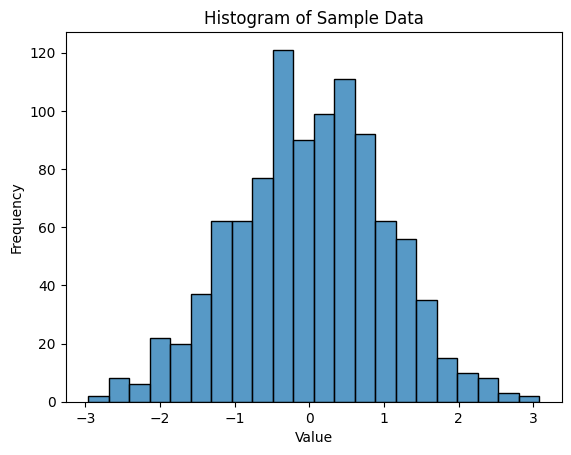

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for demonstration
data = np.random.randn(1000)

# Create a histogram using Seaborn
sns.histplot(data)

# Add title and labels
plt.title("Histogram of Sample Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

9. Use Pandas to load a CSV file and display its first 5 rows.

In [21]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
try:
  df = pd.read_csv('your_file.csv')

  # Display the first 5 rows
  print("First 5 rows of the DataFrame:")
  display(df.head())

except FileNotFoundError:
  print("Error: Make sure 'your_file.csv' is replaced with the correct path and the file exists.")
except Exception as e:
  print(f"An error occurred: {e}")

Error: Make sure 'your_file.csv' is replaced with the correct path and the file exists.


10. Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.


Correlation Matrix:


,A,B,C,D
A,1.000000,0.007940,0.241311,0.139947
B,0.007940,1.000000,-0.087421,-0.036104
C,0.241311,-0.087421,1.000000,-0.001644
D,0.139947,-0.036104,-0.001644,1.000000


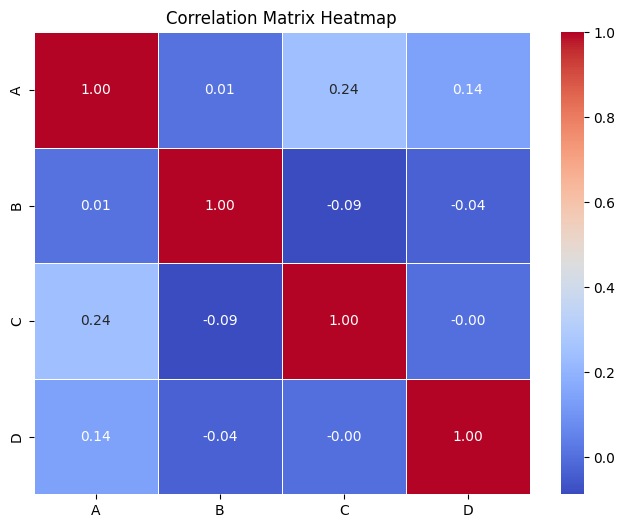

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = sample_df.corr()

print("\nCorrelation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
import pandas as pd
import numpy as np

# Generate some sample data for demonstration
data = {
    'A': np.random.rand(100),
    'B': np.random.rand(100) * 10,
    'C': np.random.randint(0, 100, 100),
    'D': np.random.randn(100)
}
sample_df = pd.DataFrame(data)

print("Sample DataFrame created:")
display(sample_df.head())

Sample DataFrame created:


,A,B,C,D
0,0.098076,0.852067,51,-0.250321
1,0.524805,0.891869,83,-0.096506
2,0.702508,1.669450,60,-0.473631
3,0.108787,8.063784,44,-1.548979
4,0.927177,9.242820,9,0.995545
